In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from espcn import espcn_model
from datagenerator import DataGenerator
from psnr import psnr

r = 3 # Upscale Factor

# Compile model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# Peak Signal-to-Noise Ratio
def PSNR(y_true, y_pred):
    max_pixel = 1.0
    return tf.image.psnr(y_true, y_pred, max_val=max_pixel)
model = espcn_model(r)
model.compile(optimizer=opt, loss='mse', metrics=[PSNR])
model.summary()

# Variables for training/loading weights
batch_size = 10
epochs = 100
filepath = 'r' + str(r) + 'bs' + str(batch_size) + 'epochs' + str(epochs) +  'weights.h5'

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 64)    4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 32)    18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 32)    9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 32)    9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 27)    7803  

In [7]:
# Fit model
training_generator = DataGenerator('LRbicx' + str(r), batch_size = batch_size)
model.fit_generator(generator = training_generator, epochs=epochs, verbose=1)
model.save_weights(filepath)
print("Saved weights at : " + filepath)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
90/90 [==============================] - 214s 2s/step - loss: 0.0419 - PSNR: 15.4763
Epoch 2/100
90/90 [==============================] - 203s 2s/step - loss: 0.0082 - PSNR: 22.0764
Epoch 3/100
90/90 [==============================] - 188s 2s/step - loss: 0.0047 - PSNR: 24.4453
Epoch 4/100
90/90 [==============================] - 184s 2s/step - loss: 0.0038 - PSNR: 25.4584
Epoch 5/100
90/90 [==============================] - 179s 2s/step - loss: 0.0032 - PSNR: 26.2833
Epoch 6/100
90/90 [==============================] - 175s 2s/step - loss: 0.0036 - PSNR: 25.5625
Epoch 7/100
90/90 [==============================] - 171s 2s/step - loss: 0.0029 - PSNR: 26.9035
Epoch 8/100
90/90 [==============================] - 170s 2s/step - loss: 0.0028 - PSNR: 26.9521
Epoch 9/100
90/90 [==============================] - 168s 2s/step - loss: 0.0029 - PSNR: 26.8222
Epoch 10/100
90/90 [==============================]

In [2]:
# Load saved weights
model.load_weights(filepath)

Low Resolution: (109, 160, 3)


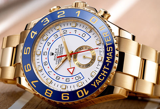

'RGB'

High Resolution: (327, 480, 3)


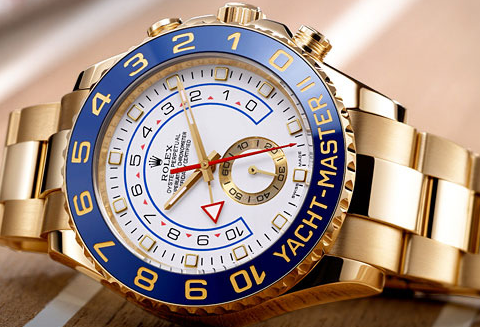

'RGB'

Super Resolution: (327, 480, 3)


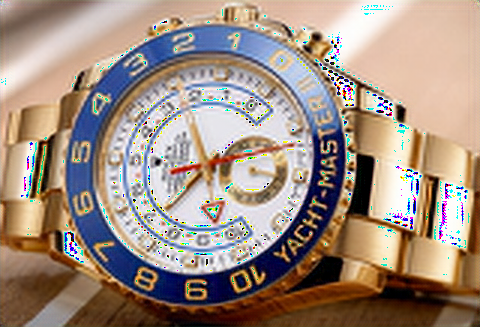

'RGB'

PSNR: 20.557129669325604


In [5]:
from PIL import Image

testing_generator = DataGenerator('LRbicx' + str(r), batch_size = 1, dictionary = "test")
lr, hr = testing_generator.__getitem__(0)
print("Low Resolution: " + str(lr[0].shape))
display(Image.fromarray((lr[0]*255.0).astype('uint8')), 'RGB')
print("High Resolution: " + str(hr[0].shape))
display(Image.fromarray((hr[0]*255.0).astype('uint8')), 'RGB')
sr = model.predict(lr)
print("Super Resolution: " + str(sr[0].shape))
display(Image.fromarray((sr[0]*255.0).astype('uint8')), 'RGB')
print("PSNR: " + str(psnr(hr[0], sr[0])))